In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#Initial palette
palette = sns.color_palette('bright')
palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

E= 134.27624702453613 ev
E= 537.1048927307129 ev
E= 1208.4860801696775 ev
E= 2148.4194755554204 ev
E= 3356.9054603576656 ev


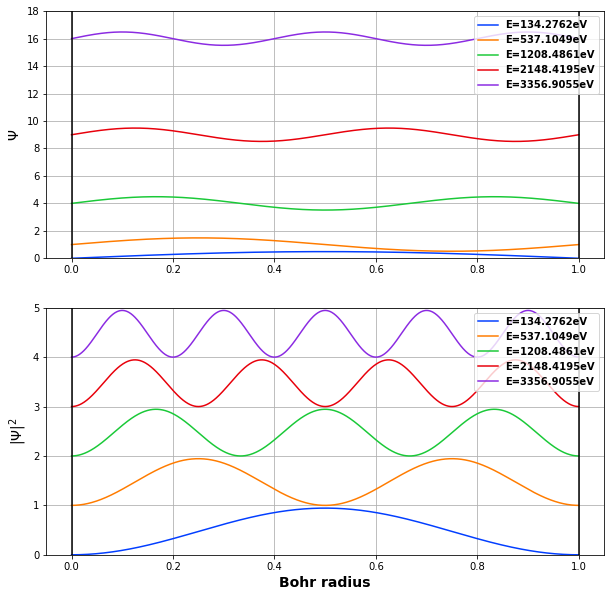

In [ ]:
def f(r,kfactor):
    psi = r[0]
    fpsi = r[1]
    fphi = -kfactor*psi
    answer = np.array([fpsi,fphi], float)
    return answer

def RK4(r,kfactor):
    #Container
    RK4v_psilist = np.empty(N,float) #x location
    RK4v_philist = np.empty(N,float) #x velocity
    RK4v_xlist = np.empty(N,float)
    #initial
    RK4v_psilist[0] = r[0]
    RK4v_philist[0] = r[1]
    RK4v_xlist[0] = 0
    
    for i in range(N-1):
        #RK4 calculation
        k1 = dx * f(r,kfactor)
        k2 = dx * f(r+k1/2,kfactor)
        k3 = dx * f(r+k2/2,kfactor)
        k4 = dx * f(r+k3,kfactor)
        r += (k1+(2*k2)+(2*k3)+k4)/6

        RK4v_psilist[i+1] = r[0]
        RK4v_philist[i+1] = r[1]
        RK4v_xlist[i+1] = RK4v_xlist[i] + dx

    ans = [RK4v_psilist, RK4v_philist, RK4v_xlist]

    return ans 

def final_psi(Energy):
    ksquare = (2*m*Energy)/(hbar**2)            ##k^2 = 2mE/hbar^2
    r = np.array([0,1],float)                   #r = [psi,phi]
    return RK4(r,ksquare)
    
##########################################################################################################################################################################################

#initial value
m = 9.1094e-31 #kg
hbar = 1.0546e-34 #Js
e = 1.6022e-19 #C
a0 = 5.292e-11 #m
dx = a0/1000      #time_step
N = int(a0/dx)+1

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

#Arbitrary initial energy 
#1
E1 = 100*e
E2 = 200*e
target_acc =abs(E1-E2)*0.000001  #target_accuracy


#first check
h1 = final_psi(E1)[0][-1]
h2 = final_psi(E2)[0][-1]
#perform binary search 
while abs(E2-E1) > target_acc:
    temp_E = (E1+E2)*0.5
    checker = final_psi(temp_E)[0][-1]      #Last psi value

    if h1 * checker > 0:
        E1, h1 = temp_E, checker
    else:
        E2, h2 = temp_E, checker

#Final value
final_E = (E1+E2)*0.5
final_h = final_psi(final_E)

print('E=',final_E/e,"ev")
const = np.sqrt(1/np.sum(final_h[0]*final_h[0]*a0/1000))/200000
ax.plot(final_h[2]/a0,const*final_h[0]/2, label=f'E={round(final_E/e,4)}eV',color=palette[0])
ax2.plot(final_h[2]/a0,final_h[0]*final_h[0]*const*const,label=f'E={round(final_E/e,4)}eV',color=palette[0])

#2
E1 = 400*e
E2 = 600*e
target_acc =abs(E1-E2)*0.000001  #target_accuracy

#first check
h1 = final_psi(E1)[0][-1]
h2 = final_psi(E2)[0][-1]

#perform binary search 
while abs(E2-E1) > target_acc:
    temp_E = (E1+E2)*0.5
    checker = final_psi(temp_E)[0][-1]      #Last psi value

    if h1 * checker > 0:
        E1, h1 = temp_E, checker
    else:
        E2, h2 = temp_E, checker

#Final value
final_E = (E1+E2)*0.5
final_h = final_psi(final_E)

print('E=',final_E/e,"ev")
const = np.sqrt(1/np.sum(final_h[0]*final_h[0]*a0/1000))/200000
ax.plot(final_h[2]/a0,const*final_h[0]/2+1, label=f'E={round(final_E/e,4)}eV',color=palette[1])
ax2.plot(final_h[2]/a0,final_h[0]*final_h[0]*const*const+1,label=f'E={round(final_E/e,4)}eV',color=palette[1])

#3
E1 = 1100*e
E2 = 1300*e
target_acc =abs(E1-E2)*0.000001  #target_accuracy

#first check
h1 = final_psi(E1)[0][-1]
h2 = final_psi(E2)[0][-1]

#perform binary search 
while abs(E2-E1) > target_acc:
    temp_E = (E1+E2)*0.5
    checker = final_psi(temp_E)[0][-1]      #Last psi value

    if h1 * checker > 0:
        E1, h1 = temp_E, checker
    else:
        E2, h2 = temp_E, checker

#Final value
final_E = (E1+E2)*0.5
final_h = final_psi(final_E)

print('E=',final_E/e,"ev")
const = np.sqrt(1/np.sum(final_h[0]*final_h[0]*a0/1000))/200000
ax.plot(final_h[2]/a0,const*final_h[0]/2+4, label=f'E={round(final_E/e,4)}eV',color=palette[2])
ax2.plot(final_h[2]/a0,final_h[0]*final_h[0]*const*const+2,label=f'E={round(final_E/e,4)}eV',color=palette[2])


#4
E1 = 2000*e
E2 = 2200*e
target_acc =abs(E1-E2)*0.000001  #target_accuracy

#first check
h1 = final_psi(E1)[0][-1]
h2 = final_psi(E2)[0][-1]

#perform binary search 
while abs(E2-E1) > target_acc:
    temp_E = (E1+E2)*0.5
    checker = final_psi(temp_E)[0][-1]      #Last psi value

    if h1 * checker > 0:
        E1, h1 = temp_E, checker
    else:
        E2, h2 = temp_E, checker

#Final value
final_E = (E1+E2)*0.5
final_h = final_psi(final_E)

print('E=',final_E/e,"ev")
const = np.sqrt(1/np.sum(final_h[0]*final_h[0]*a0/1000))/200000
ax.plot(final_h[2]/a0,const*final_h[0]/2+9, label=f'E={round(final_E/e,4)}eV',color=palette[3])
ax2.plot(final_h[2]/a0,final_h[0]*final_h[0]*const*const+3,label=f'E={round(final_E/e,4)}eV',color=palette[3])


#5
E1 = 3200*e
E2 = 3400*e
target_acc =abs(E1-E2)*0.000001  #target_accuracy

#first check
h1 = final_psi(E1)[0][-1]
h2 = final_psi(E2)[0][-1]

#perform binary search 
while abs(E2-E1) > target_acc:
    temp_E = (E1+E2)*0.5
    checker = final_psi(temp_E)[0][-1]      #Last psi value

    if h1 * checker > 0:
        E1, h1 = temp_E, checker
    else:
        E2, h2 = temp_E, checker

#Final value
final_E = (E1+E2)*0.5
final_h = final_psi(final_E)

print('E=',final_E/e,"ev")
const = np.sqrt(1/np.sum(final_h[0]*final_h[0]*a0/1000))/200000
ax.plot(final_h[2]/a0,const*final_h[0]/2+16, label=f'E={round(final_E/e,4)}eV',color=palette[4])
ax2.plot(final_h[2]/a0,final_h[0]*final_h[0]*const*const+4,label=f'E={round(final_E/e,4)}eV',color=palette[4])

xliner = [0,0]
xliners = [1,1]
yliner = [0,30]
ax.plot(xliner,yliner,color='k')
ax2.plot(xliner,yliner,color='k')
ax.plot(xliners,yliner,color='k')
ax2.plot(xliners,yliner,color='k')

ax2.set_xlabel('Bohr radius', fontsize = 14, fontweight='bold')
ax.set_ylabel('$\Psi$',rotation=90, fontsize = 14, fontweight='bold')
ax2.set_ylabel('$|{\Psi}|^2$',rotation=90, fontsize = 14, fontweight='bold')
legend_properties = {'weight':'bold','size':'10'}
ax2.legend(loc=1,frameon=True, prop=legend_properties)
ax.legend(loc=1,frameon=True, prop=legend_properties)
ax.grid()
ax2.grid()
ax.set_ylim(0,18)
ax2.set_ylim(0,5)
plt.savefig('Infinite well',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
final_h

[array([0.00000000e+00, 5.29178238e-14, 1.05822591e-13, ...,
        1.05823275e-13, 5.29185082e-14, 6.84493200e-19]),
 array([ 1.        ,  0.99987663,  0.99950656, ..., -0.99950655,
        -0.99987663, -1.        ]),
 array([0.000000e+00, 5.292000e-14, 1.058400e-13, ..., 5.281416e-11,
        5.286708e-11, 5.292000e-11])]

E= 138.02397203107833 ev
E= 414.07191608450375 ev
E= 690.1198601524811 ev
E= 966.1678042291899 ev
E= 1242.2157485561913 ev


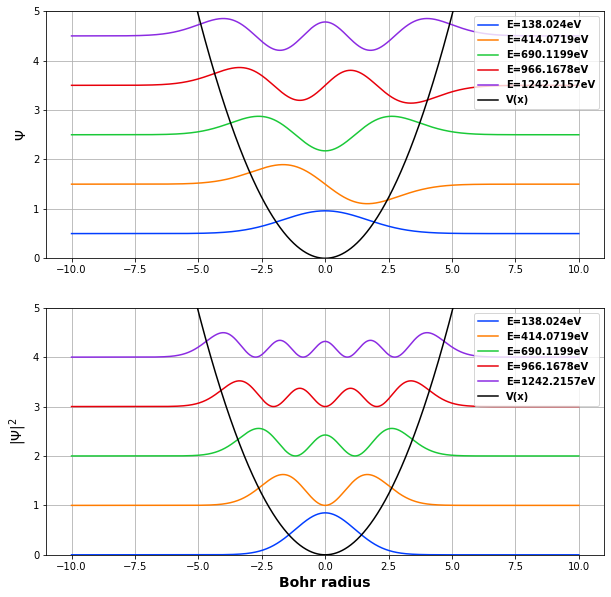

In [ ]:
#Quantum oscillators
def f(r,kfactor,x):
    psi = r[0]
    fpsi = r[1]
    fphi = (V(x)-kfactor)*psi
    answer = np.array([fpsi,fphi], float)
    return answer

def V(x):
    v2 = 2*m*V0/(hbar**2*a0**2)
    return v2*x**2
    
def RK4(r,kfactor):
    #Container
    RK4v_psilist = np.empty(N,float) #x location
    RK4v_philist = np.empty(N,float) #x velocity
    RK4v_xlist = np.empty(N,float)
    #initial
    RK4v_psilist[0] = r[0]
    RK4v_philist[0] = r[1]
    RK4v_xlist[0] = -10*a0          #starting at -10a0 (to +10a0)

    for i in range(N-1):
        #RK4 calculation
        k1 = dx * f(r,kfactor,RK4v_xlist[i])
        k2 = dx * f(r+k1/2,kfactor,RK4v_xlist[i]+dx/2)
        k3 = dx * f(r+k2/2,kfactor,RK4v_xlist[i]+dx/2)
        k4 = dx * f(r+k3,kfactor,RK4v_xlist[i]+dx)
        r += (k1+(2*k2)+(2*k3)+k4)/6
        RK4v_psilist[i+1] = r[0]
        RK4v_philist[i+1] = r[1]
        RK4v_xlist[i+1] = RK4v_xlist[i] + dx
    
    ans = [RK4v_psilist, RK4v_philist, RK4v_xlist]

    return ans 

def final_psi(Energy):
    ksquare = (2*m*Energy)/(hbar**2)            ##k^2 = 2mE/hbar^2
    r = np.array([0,1],float)                   #r = [psi,phi]
    return RK4(r,ksquare)


######################################################################################
fig = plt.figure(figsize=(10,10))
legend_properties = {'weight':'bold','size':'10'}
ax = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
#initial value
m = 9.1094e-31 #kg
hbar = 1.0546e-34 #Js
e = 1.6022e-19 #C
a0 = 1e-11 #m
dx = (a0)/1000      #x_step
N = int((20*a0)/dx)+1
V0 = 50*e

#1
E1 = 100*e
E2 = 200*e
target_acc =abs(E1-E2)*1e-10  #target_accuracy
#first check
h1 = final_psi(E1)[0][-1]
h2 = final_psi(E2)[0][-1]
#perform binary search 
while abs(E2-E1) > target_acc:
    temp_E = (E1+E2)*0.5
    checker = final_psi(temp_E)[0][-1]      #Last psi value

    if h1 * checker > 0:
        E1, h1 = temp_E, checker
    else:
        E2, h2 = temp_E, checker
#Final value
final_E = (E1+E2)*0.5
final_h = final_psi(final_E)
print('E=',final_E/e,"ev")
const = np.sqrt(1/np.sum(final_h[0]*final_h[0]*a0/1000))/200000
ax.plot(final_h[2]/a0,const*final_h[0]/2+0.5, label=f'E={round(final_E/e,4)}eV',color=palette[0])
ax2.plot(final_h[2]/a0,final_h[0]*final_h[0]*const*const,label=f'E={round(final_E/e,4)}eV',color=palette[0])

#2
E1 = 300*e
E2 = 500*e
target_acc =abs(E1-E2)*1e-10  #target_accuracy
#first check
h1 = final_psi(E1)[0][-1]
h2 = final_psi(E2)[0][-1]
#perform binary search 
while abs(E2-E1) > target_acc:
    temp_E = (E1+E2)*0.5
    checker = final_psi(temp_E)[0][-1]      #Last psi value

    if h1 * checker > 0:
        E1, h1 = temp_E, checker
    else:
        E2, h2 = temp_E, checker
#Final value
final_E = (E1+E2)*0.5
final_h = final_psi(final_E)
print('E=',final_E/e,"ev")
const = np.sqrt(1/np.sum(final_h[0]*final_h[0]*a0/1000))/200000
ax.plot(final_h[2]/a0,const*final_h[0]/2+1.5, label=f'E={round(final_E/e,4)}eV',color=palette[1])
ax2.plot(final_h[2]/a0,final_h[0]*final_h[0]*const*const+1,label=f'E={round(final_E/e,4)}eV',color=palette[1])

#3
E1 = 500*e
E2 = 700*e
target_acc =abs(E1-E2)*1e-10  #target_accuracy
#first check
h1 = final_psi(E1)[0][-1]
h2 = final_psi(E2)[0][-1]
#perform binary search 
while abs(E2-E1) > target_acc:
    temp_E = (E1+E2)*0.5
    checker = final_psi(temp_E)[0][-1]      #Last psi value

    if h1 * checker > 0:
        E1, h1 = temp_E, checker
    else:
        E2, h2 = temp_E, checker
#Final value
final_E = (E1+E2)*0.5
final_h = final_psi(final_E)
print('E=',final_E/e,"ev")
const = np.sqrt(1/np.sum(final_h[0]*final_h[0]*a0/1000))/200000
ax.plot(final_h[2]/a0,const*final_h[0]/2+2.5, label=f'E={round(final_E/e,4)}eV',color=palette[2])
ax2.plot(final_h[2]/a0,final_h[0]*final_h[0]*const*const+2,label=f'E={round(final_E/e,4)}eV',color=palette[2])

#4
E1 = 800*e
E2 = 1100*e
target_acc =abs(E1-E2)*1e-10  #target_accuracy
#first check
h1 = final_psi(E1)[0][-1]
h2 = final_psi(E2)[0][-1]
#perform binary search 
while abs(E2-E1) > target_acc:
    temp_E = (E1+E2)*0.5
    checker = final_psi(temp_E)[0][-1]      #Last psi value

    if h1 * checker > 0:
        E1, h1 = temp_E, checker
    else:
        E2, h2 = temp_E, checker
#Final value
final_E = (E1+E2)*0.5
final_h = final_psi(final_E)
print('E=',final_E/e,"ev")
const = np.sqrt(1/np.sum(final_h[0]*final_h[0]*a0/1000))/200000
ax.plot(final_h[2]/a0,const*final_h[0]/2+3.5, label=f'E={round(final_E/e,4)}eV',color=palette[3])
ax2.plot(final_h[2]/a0,final_h[0]*final_h[0]*const*const+3,label=f'E={round(final_E/e,4)}eV',color=palette[3])

#5
E1 = 1100*e
E2 = 1300*e
target_acc =abs(E1-E2)*1e-10  #target_accuracy
#first check
h1 = final_psi(E1)[0][-1]
h2 = final_psi(E2)[0][-1]
#perform binary search 
while abs(E2-E1) > target_acc:
    temp_E = (E1+E2)*0.5
    checker = final_psi(temp_E)[0][-1]      #Last psi value

    if h1 * checker > 0:
        E1, h1 = temp_E, checker
    else:
        E2, h2 = temp_E, checker
#Final value
final_E = (E1+E2)*0.5
final_h = final_psi(final_E)
print('E=',final_E/e,"ev")
const = np.sqrt(1/np.sum(final_h[0]*final_h[0]*a0/1000))/200000
ax.plot(final_h[2]/a0,const*final_h[0]/2+4.5, label=f'E={round(final_E/e,4)}eV',color=palette[4])
ax2.plot(final_h[2]/a0,final_h[0]*final_h[0]*const*const+4,label=f'E={round(final_E/e,4)}eV',color=palette[4])

potentials = V(final_h[2])/10e21*3
ax.plot(final_h[2]/a0,potentials/2, label='V(x)',color='k')
ax2.plot(final_h[2]/a0,potentials/2,label='V(x)',color='k')
ax2.set_xlabel('Bohr radius', fontsize = 14, fontweight='bold')
ax.set_ylabel('$\Psi$',rotation=90, fontsize = 14, fontweight='bold')
ax2.set_ylabel('$|{\Psi}|^2$',rotation=90, fontsize = 14, fontweight='bold')
ax2.legend(loc=1,frameon=True, prop=legend_properties)
ax.legend(loc=1,frameon=True, prop=legend_properties)
ax.set_ylim(0,5)
ax2.set_ylim(0,5)
ax.grid()
ax2.grid()
plt.savefig('Harmonic_osc',dpi=300,bbox_inches='tight')
plt.show()

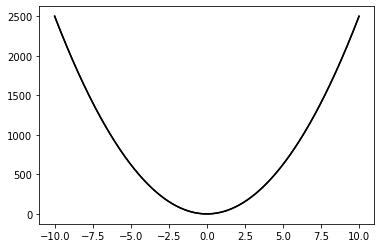

In [ ]:
ref = V0*final_h[2]*final_h[2]/(2*a0*a0*e)
plt.plot(final_h[2]/a0,ref, label='V(x)',color='k')
plt.plot(final_h[2]/a0,ref,label='V(x)',color='k')
plt.show()